In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error



In [5]:
df_processed = pd.read_excel("Pre_processed_data.xlsx")
df_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Out_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,Outlet_Identifier,Item_Identifier,source
0,9.30,0.016047,249.8092,3735.1380,14,1,0,0,0,0,...,0,1,0,0,0,1,0,OUT049,FDA15,train
1,5.92,0.019278,48.2692,443.4228,4,0,1,0,0,0,...,0,0,1,0,1,0,0,OUT018,DRC01,train
2,17.50,0.016760,141.6180,2097.2700,14,1,0,0,0,0,...,0,1,0,0,0,1,0,OUT049,FDN15,train
3,19.20,0.060793,182.0950,732.3800,15,0,1,0,0,0,...,1,0,0,0,0,1,0,OUT010,FDX07,train
4,8.93,0.048068,53.8614,994.7052,26,1,0,0,0,0,...,0,1,0,0,0,0,1,OUT013,NCD19,train


In [6]:
train_preprocessed = df_processed.loc[df_processed['source']=='train']
test_preprocessed = df_processed.loc[df_processed['source']=='test']

In [15]:
train_preprocessed.tail()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Out_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,Outlet_Identifier,Item_Identifier,source
8518,6.865,0.056783,214.5218,2778.3834,26,1,0,0,0,0,...,0,1,0,0,0,1,0,OUT013,FDF22,train
8519,8.380,0.046982,108.1570,549.2850,11,0,1,1,0,0,...,0,1,0,0,0,1,0,OUT045,FDS36,train
8520,10.600,0.035186,85.1224,1193.1136,9,1,0,0,0,0,...,0,1,0,0,0,0,1,OUT035,NCJ29,train
8521,7.210,0.145221,103.1332,1845.5976,4,0,1,0,0,0,...,0,0,1,0,0,1,0,OUT018,FDN46,train
8522,14.800,0.044878,75.4670,765.6700,16,1,0,0,0,0,...,0,1,0,0,1,0,0,OUT046,DRG01,train


In [11]:
train_preprocessed.shape,test_preprocessed.shape

((8523, 36), (5681, 36))

In [14]:
test_preprocessed.drop(columns=['source'],inplace=True)
#or
del test_preprocessed['source']
test_preprocessed

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Out_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,Outlet_Identifier,Item_Identifier
8523,20.750000,0.007565,107.8622,NaN,14,1,0,0,0,0,...,0,0,1,0,0,0,1,0,OUT049,FDW58
8524,8.300000,0.038428,87.3198,NaN,6,0,1,0,0,0,...,0,0,1,0,0,0,1,0,OUT017,FDW14
8525,14.600000,0.099575,241.7538,NaN,15,1,0,0,0,0,...,1,1,0,0,0,0,0,1,OUT010,NCN55
8526,7.315000,0.015388,155.0340,NaN,6,1,0,0,0,0,...,0,0,1,0,0,0,1,0,OUT017,FDQ58
8527,12.735577,0.118599,234.2300,NaN,28,0,1,0,0,0,...,1,0,0,0,1,0,1,0,OUT027,FDY38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500000,0.013496,141.3154,NaN,16,0,1,0,0,0,...,0,0,1,0,0,0,1,0,OUT046,FDB58
14200,7.600000,0.142991,169.1448,NaN,4,0,1,0,0,0,...,1,0,0,1,0,0,1,0,OUT018,FDD47
14201,10.000000,0.073529,118.7440,NaN,11,1,0,0,0,0,...,0,0,1,0,0,0,0,1,OUT045,NCO17
14202,15.300000,0.060793,214.6218,NaN,6,0,1,0,0,0,...,0,0,1,0,0,0,1,0,OUT017,FDJ26


In [26]:
del train_preprocessed['source']

In [28]:
X_train = train_preprocessed.drop(columns=['Outlet_Identifier','Item_Outlet_Sales','Item_Identifier'])
X_test = test_preprocessed.drop(columns=['Outlet_Identifier','Item_Outlet_Sales','Item_Identifier'])
train_y=train_preprocessed['Item_Outlet_Sales']
test_y=test_preprocessed['Item_Outlet_Sales']
X_train
#train_y

,Item_Weight,Item_Visibility,Item_MRP,Out_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC
0,9.300,0.016047,249.8092,14,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,48.2692,4,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,141.6180,14,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.060793,182.0950,15,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.048068,53.8614,26,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,26,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,108.1570,11,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,85.1224,9,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,103.1332,4,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [30]:
lr= LinearRegression()
lr.fit(X_train,train_y)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
pred_test = abs(pred_test)
print("MAE:",mean_absolute_error(train_y,pred_train))
print("MSE:",mean_squared_error(train_y,pred_train))
print("RMSE",np.sqrt(mean_squared_error(train_y,pred_train)))
print("R2 Squared",r2_score(train_y,pred_train))

MAE: 836.0504345282344
MSE: 1273425.8088351896
RMSE 1128.4617002074947
R2 Squared 0.5626670330257408


In [31]:
submission = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-Batch-17/main/Day%206%20Bigmart%20Sales%20prediction/sample_submission_8RXa3c6.csv")

In [32]:
submission['Item_Outlet_Sales']=pred_test

In [33]:
submission.to_csv("Submission_TG.csv",index=False)

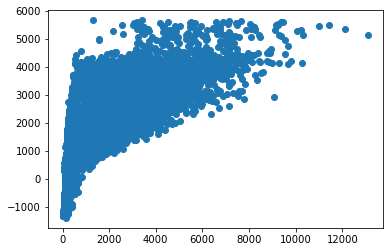

In [38]:
plt.scatter(train_y,pred_train)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

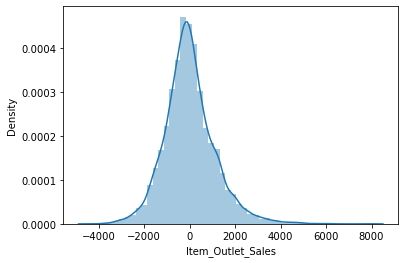

In [39]:
residuals = train_y-pred_train
sns.distplot(residuals)

In [40]:
pred_test

array([1798.02387927, 1487.04096982, 1910.42017559, ..., 1946.37237746,
       3535.82650063, 1410.26608299])